In [3]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv("../../datasets/oral_cancer.csv").drop(columns="ID")

In [4]:
df.head()

,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,Low,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,High,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,UK,37,Female,No,Yes,No,No,Yes,Yes,Moderate,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,Moderate,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,South Africa,68,Male,No,No,No,No,No,Yes,High,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


In [5]:
df.shape

(84922, 24)

In [6]:
df.isna().any()

Country                                     False
Age                                         False
Gender                                      False
Tobacco Use                                 False
Alcohol Consumption                         False
HPV Infection                               False
Betel Quid Use                              False
Chronic Sun Exposure                        False
Poor Oral Hygiene                           False
Diet (Fruits & Vegetables Intake)           False
Family History of Cancer                    False
Compromised Immune System                   False
Oral Lesions                                False
Unexplained Bleeding                        False
Difficulty Swallowing                       False
White or Red Patches in Mouth               False
Tumor Size (cm)                             False
Cancer Stage                                False
Treatment Type                              False
Survival Rate (5-Year, %)                   False


In [7]:
bool(df.duplicated().any())

True

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(83532, 24)

In [10]:
df.describe(include="all")

,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
count,83532,83532.000000,83532,83532,83532,83532,83532,83532,83532,83532,...,83532,83532,83532.000000,83532.000000,83532,83532.000000,83532.000000,83532.00000,83532,83532
unique,17,NaN,2,2,2,2,2,2,2,3,...,2,2,NaN,NaN,5,NaN,NaN,NaN,2,2
top,India,NaN,Male,Yes,Yes,No,No,No,No,Low,...,No,No,NaN,NaN,No Treatment,NaN,NaN,NaN,Yes,Yes
freq,7937,NaN,59170,66675,49996,58349,59322,66752,41915,33305,...,62446,54054,NaN,NaN,49626,NaN,NaN,NaN,45991,42349
mean,NaN,54.510906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.776370,1.137373,NaN,79.162293,39760.682553,52.89416,NaN,NaN
std,NaN,10.055549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.032337,1.343669,NaN,26.569777,44793.237183,60.51297,NaN,NaN
min,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,NaN,10.000750,0.000000,0.00000,NaN,NaN
25%,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,NaN,64.813142,0.000000,0.00000,NaN,NaN
50%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.066190,1.000000,NaN,89.580004,28458.125000,32.00000,NaN,NaN
75%,NaN,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.528456,2.000000,NaN,100.000000,77190.312500,105.00000,NaN,NaN


In [11]:
df["Country"], country_list = df["Country"].factorize()

In [12]:
df["Gender"] = df["Gender"].map({
    "Female": 1,
    "Male": 0
})

In [13]:
df["Treatment Type"] = df["Treatment Type"].map({
    "Surgery": 4,
    "Radiation": 3,
    "Chemotherapy": 2,
    "Targeted Therapy": 1,
    "No Treatment": 0
})

In [14]:
df["Diet (Fruits & Vegetables Intake)"] = df["Diet (Fruits & Vegetables Intake)"].map({
    "Low": 0,
    "Moderate": 1,
    "High": 2
})

In [15]:
yes_no_list = [
    "Tobacco Use",
    "Alcohol Consumption",
    "HPV Infection",
    "Betel Quid Use",
    "Chronic Sun Exposure",
    "Poor Oral Hygiene",
    "Family History of Cancer",
    "Compromised Immune System",
    "Oral Lesions",
    "Unexplained Bleeding",
    "Difficulty Swallowing",
    "White or Red Patches in Mouth",
    "Early Diagnosis",
    "Oral Cancer (Diagnosis)"
]

for column in yes_no_list:
    df[column] = df[column].map({ "Yes": 1, "No": 0 })

In [16]:
df

,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,0,36,1,1,1,1,0,0,1,0,...,0,0,0.000000,0,0,100.000000,0.00,0,0,0
1,1,64,0,1,1,1,0,1,1,2,...,0,0,1.782186,1,0,83.340103,77772.50,177,0,1
2,2,37,1,0,1,0,0,1,1,1,...,0,1,3.523895,2,4,63.222871,101164.50,130,1,1
3,3,55,0,1,1,0,1,0,1,1,...,0,0,0.000000,0,0,100.000000,0.00,0,1,0
4,4,68,0,0,0,0,0,0,1,2,...,0,0,2.834789,3,0,44.293199,45354.75,52,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84917,6,46,0,1,0,0,0,0,1,1,...,0,1,0.000000,0,0,100.000000,0.00,0,1,0
84918,6,41,0,1,1,0,0,0,0,1,...,1,1,0.000000,0,0,100.000000,0.00,0,1,0
84919,5,72,0,1,1,0,1,0,1,2,...,0,0,4.777394,1,4,85.633426,81352.50,90,0,1
84920,1,67,0,1,0,0,0,0,0,0,...,1,0,0.000000,0,0,100.000000,0.00,0,1,0


<Axes: >

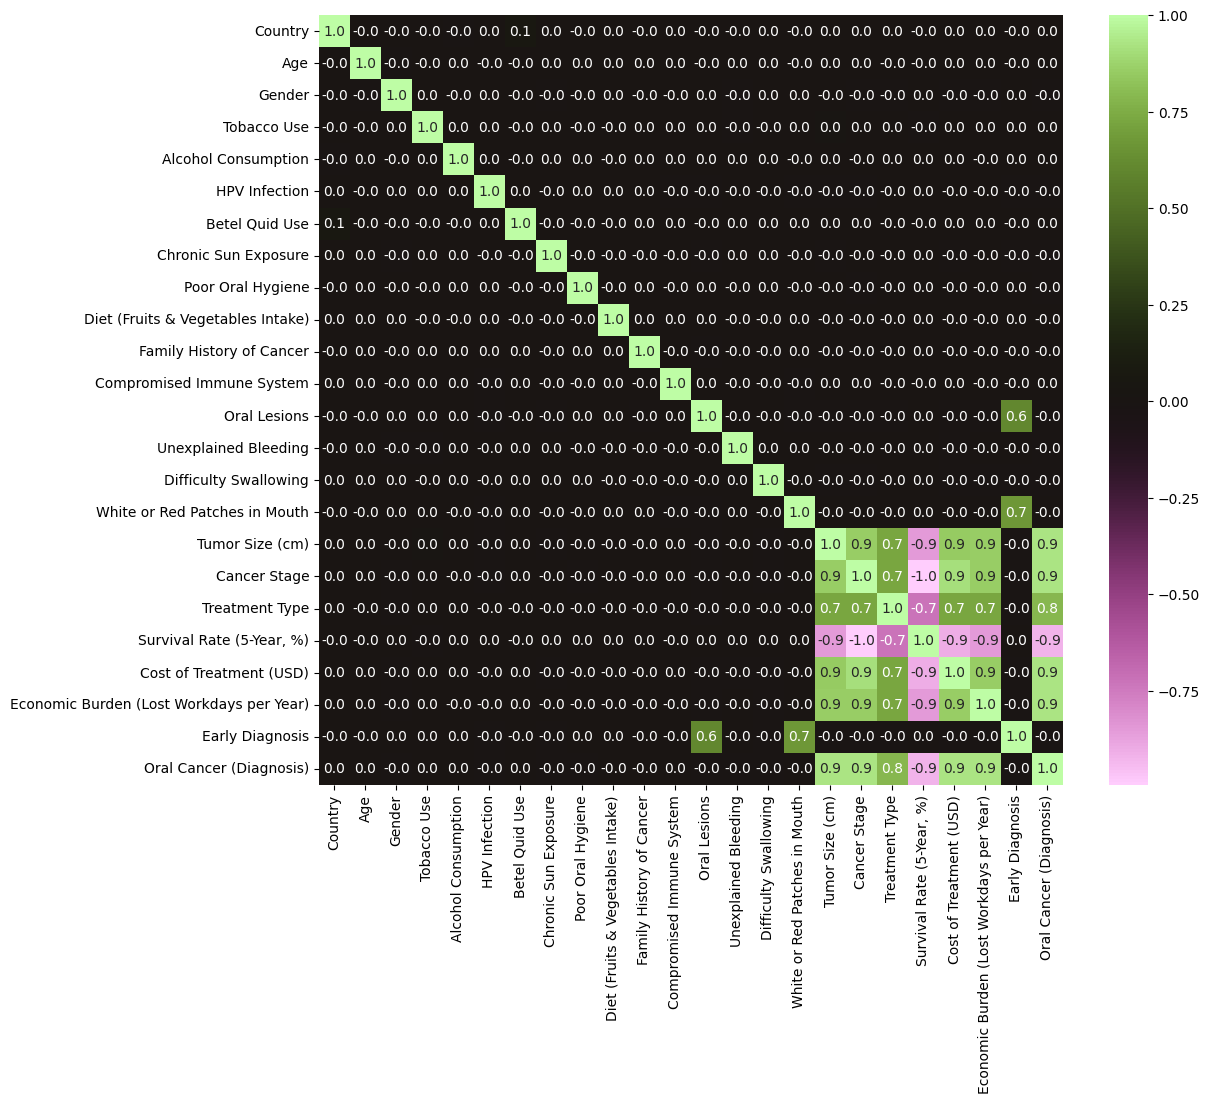

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr(method="spearman")

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".1f", cmap="vanimo")

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

y = df["Oral Cancer (Diagnosis)"]
x = df.drop(columns=["Oral Cancer (Diagnosis)"])
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [22]:
x

,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),...,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis
0,0.0000,0.244186,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,0.00,0.0,1.000000,0.000000,0.000000,0.0
1,0.0625,0.569767,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.297036,0.25,0.0,0.814888,0.486115,0.988827,0.0
2,0.1250,0.255814,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.5,...,0.0,0.0,1.0,0.587326,0.50,1.0,0.591362,0.632326,0.726257,1.0
3,0.1875,0.465116,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.5,...,0.0,0.0,0.0,0.000000,0.00,0.0,1.000000,0.000000,0.000000,1.0
4,0.2500,0.616279,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.472473,0.75,0.0,0.381030,0.283488,0.290503,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83527,0.3750,0.360465,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,...,0.0,0.0,1.0,0.000000,0.00,0.0,1.000000,0.000000,0.000000,1.0
83528,0.3750,0.302326,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.5,...,0.0,1.0,1.0,0.000000,0.00,0.0,1.000000,0.000000,0.000000,1.0
83529,0.3125,0.662791,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.796246,0.25,1.0,0.840370,0.508491,0.502793,0.0
83530,0.0625,0.604651,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,0.00,0.0,1.000000,0.000000,0.000000,1.0


In [23]:
y

0        0
1        1
2        1
3        0
4        1
        ..
84917    0
84918    0
84919    1
84920    0
84921    0
Name: Oral Cancer (Diagnosis), Length: 83532, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [25]:
x_train.shape

(62649, 23)

In [ ]:
from keras import models, layers

model = models.Sequential()

model.add(layers.Input(shape=(x_train.shape[1],)))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [34]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9167 - loss: 0.2555 - val_accuracy: 0.9998 - val_loss: 0.0047
Epoch 2/3
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9999 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 9.7713e-04
Epoch 3/3
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9999 - loss: 8.1522e-04 - val_accuracy: 1.0000 - val_loss: 3.0081e-04


In [36]:
model.save("../../models/oral_cancer_predictor.keras")